In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
data_train = pd.read_csv('fashion-mnist_train.csv')#colu=label=y #2-last =data=x
data_test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [5]:
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [6]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [9]:
batch_size = 256
num_classes = 10
epochs = 50 #iteration

#input image dimensions
img_rows, img_cols = 28, 28

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [12]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 262s 5ms/step - loss: 0.8764 - accuracy: 0.6762 - val_loss: 0.5234 - val_accuracy: 0.8100
Epoch 2/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.5316 - accuracy: 0.7994 - val_loss: 0.4179 - val_accuracy: 0.8478
Epoch 3/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.4553 - accuracy: 0.8317 - val_loss: 0.3727 - val_accuracy: 0.8602
Epoch 4/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.4090 - accuracy: 0.8508 - val_loss: 0.3481 - val_accuracy: 0.8727
Epoch 5/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.3762 - accuracy: 0.8643 - val_loss: 0.3153 - val_accuracy: 0.8863
Epoch 6/50
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3550 - accuracy: 0.8728 - val_loss: 0.2992 - val_accuracy: 0.8911
Epoch 7/50
48000/48000 [==============================] - 57s 1ms/s

In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19915939042568206
Test accuracy: 0.9261000156402588


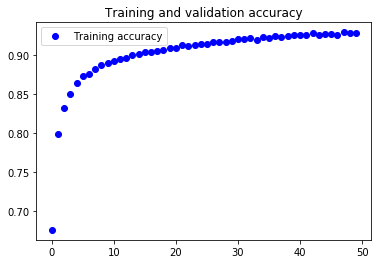

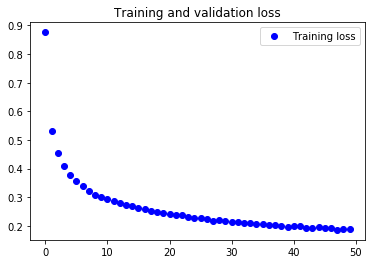

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()